### Classificação multiclasse e multirótulo
* Como o próprio nome diz, esse tipo de classificação acontece quando existem mais de 2 tipos de classe no conjunto de dados;
* Neste exemplo usaremos apenas  regressão logística, mas outros modelos também podem ser usados.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset("iris")

In [3]:
df.shape

(150, 5)

In [4]:
df.head(500)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [9]:
X = df.drop(columns='species')
y = df.species

In [10]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
X_train.shape

(105, 4)

In [14]:
X_test.shape

(45, 4)

### Regressão logística com python 

In [15]:
# Criando modelo e treinando com os dados de treino
rl = LogisticRegression()
rl.fit(X_train, y_train)


LogisticRegression()

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
cv_scores = cross_val_score(rl,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Média dos Scores = 0.9733333333333334


In [18]:
# Fazendo a predição nos dados de treino
rl_predict = rl.predict(X_test)

In [19]:
print(classification_report(y_test,rl_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.90      0.95        10
   virginica       0.95      1.00      0.98        21

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



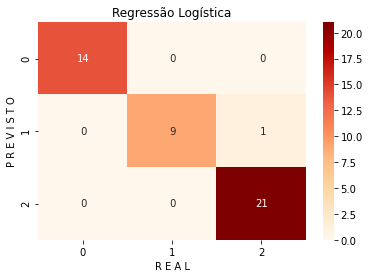

In [20]:
sns.heatmap(confusion_matrix(y_test,rl_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [19]:
X_test.shape

(105, 4)

## Naive Bayes 

In [21]:
#Vamos instanciar
nb = GaussianNB()

#Treinar
nb.fit(X_train, y_train)

GaussianNB()

In [22]:
nb.score(X_train, y_train)

0.9523809523809523

In [23]:
cv_scores = cross_val_score(nb,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Média dos Scores = 0.9533333333333334


In [24]:
# Fazendo a predição nos dados de treino
nb_predict = rl.predict(X_test)

In [25]:
print(classification_report(y_test,nb_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.90      0.95        10
   virginica       0.95      1.00      0.98        21

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



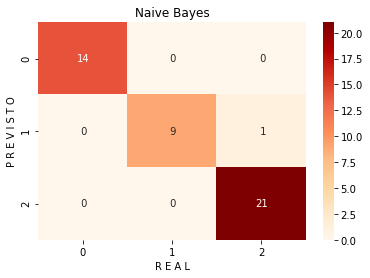

In [26]:
sns.heatmap(confusion_matrix(y_test,nb_predict), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Naive Bayes')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

#### Obs: A Curva ROC é apenas para classificação binária.

### Referências

#### Dados ao Cubo. Disponível em: https://dadosaocubo.com/classificacao-com-scikit-learn/. Acesso em 24/10/2022.
#### Comitê de classificadores, Classificação multiclasse e multirrótulo. Disponível em: https://medium.com/@f2acode/comit%C3%AA-de-classificadores-classifica%C3%A7%C3%A3o-multiclasse-e-multirr%C3%B3tulo-7a01d87ee9b8. Acesso em 24/10/2022.
#### CLASSIFICAÇÃO MULTICLASSE USANDO SCIKIT-LEARN. Disponível em: https://acervolima.com/classificacao-multiclasse-usando-scikit-learn/#:~:text=Na%20classifica%C3%A7%C3%A3o%20multiclasse%2C%20temos%20um,ser%20r%C3%B3tulos%20de%20classes%20diferentes. Acesso em 24/10/2022.